## 1. Importing the necessary libraries

In [173]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns   
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import copy
sns.set(color_codes=True)
%matplotlib inline 

## 2. Reading the data as a data frame

In [174]:
insurance_df = pd.read_excel(r'C:\Users\rdsri\OneDrive\insurance.xlsx')

In [175]:
# Using head() function to check whether the data is fetched or not

# Displaying the first 10 rows of the dataframe
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# 3. Performing basic EDA and my insights on the data

## a. Shape of the data

In [113]:
insurance_df.shape

(1338, 7)

The insurance dataframe contains 1338 instances with 7 attributes

## b. Data type of each attribute

In [114]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Here, the columns 'age', 'bmi', 'children' & 'charges' are of the data type int64 & float64 which means the values are numeric. And the columns 'sex', 'smoker' & 'region' with datatype as object are the columns which contain non-numeric (string) values.

## c.  Checking the presence of missing values

In [146]:
insurance_df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

There are no null values in the dataset

## d.  5 point summary of all the numerical attributes

In [147]:
new_df = insurance_df.describe().T                   #Generating Descriptive Statistics in Transpose (.T)
idx = pd.IndexSlice                                                     
new_df.loc[idx[:],['min','25%','50%','75%','max']]   #Slicing the dataframe for the Five Point Summary attributes

,min,25%,50%,75%,max
age,18.0000,27.00000,39.000,51.000000,64.00000
bmi,15.9600,26.29625,30.400,34.693750,53.13000
children,0.0000,0.00000,1.000,2.000000,5.00000
charges,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Here, we can observe that
- Data of people from age of 18 (youngest) to the age of 64 (oldest) is contained in the dataset.
- Average BMI is 30 stating that 50% of the people are considered obese (bmi > 25).
- 75% of the people have 2 or less children. 
- Less than 50% of the people have no children or dependents insured.
- The maximum number of children is 5.
- People have an average of one children or dependents insured under medical insurance.
- Medical charges claimed is left skewed (as seen in the below graph) stating that people are insured with basic medicare. And less of number of people are diagnosed with critical illnesses.

## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

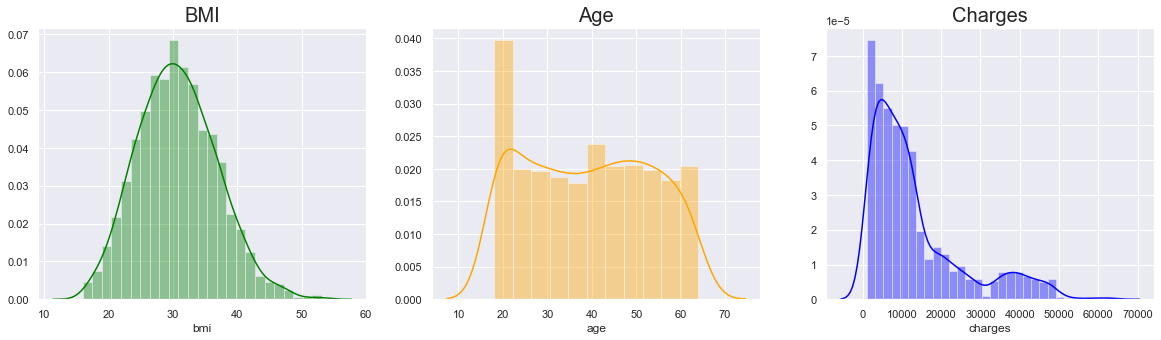

In [117]:
plt.figure(figsize=(20,5))

#Distribution of BMI
plt.subplot(1,3,1)
plt.title(label = 'BMI', fontsize = 20)
sns.distplot(insurance_df['bmi'],color='Green')

#Distribution of age
plt.subplot(1,3,2)
plt.title(label = 'Age', fontsize = 20)
sns.distplot(insurance_df['age'], color='Orange')

#Distribution of medical charges
plt.subplot(1,3,3)
plt.title(label = 'Charges', fontsize = 20)
sns.distplot(insurance_df['charges'], color='Blue')

plt.show()       #Displaying all the figures

Here, it is observed that
- BMI has a bell curve which means it is normally distributed.
- Age is distributed quiet uniformly with two slight peaks.
- Charges are highly skewed to the left stating that more people claimed the medical bill for charges arounf 10000.

## f. Measuring of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [118]:
# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
#Creating a new dataframe with skewneess details
skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_df.bmi),stats.skew(insurance_df.age),stats.skew(insurance_df.charges)]},
                        index=['bmi','age','charges'])
skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


Here are the observations:
- Skew of bmi is very less.
- Age is uniformly distributed and there's no prominent skewness in the data.
- Charges are highly skewed.

## g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges’ columns

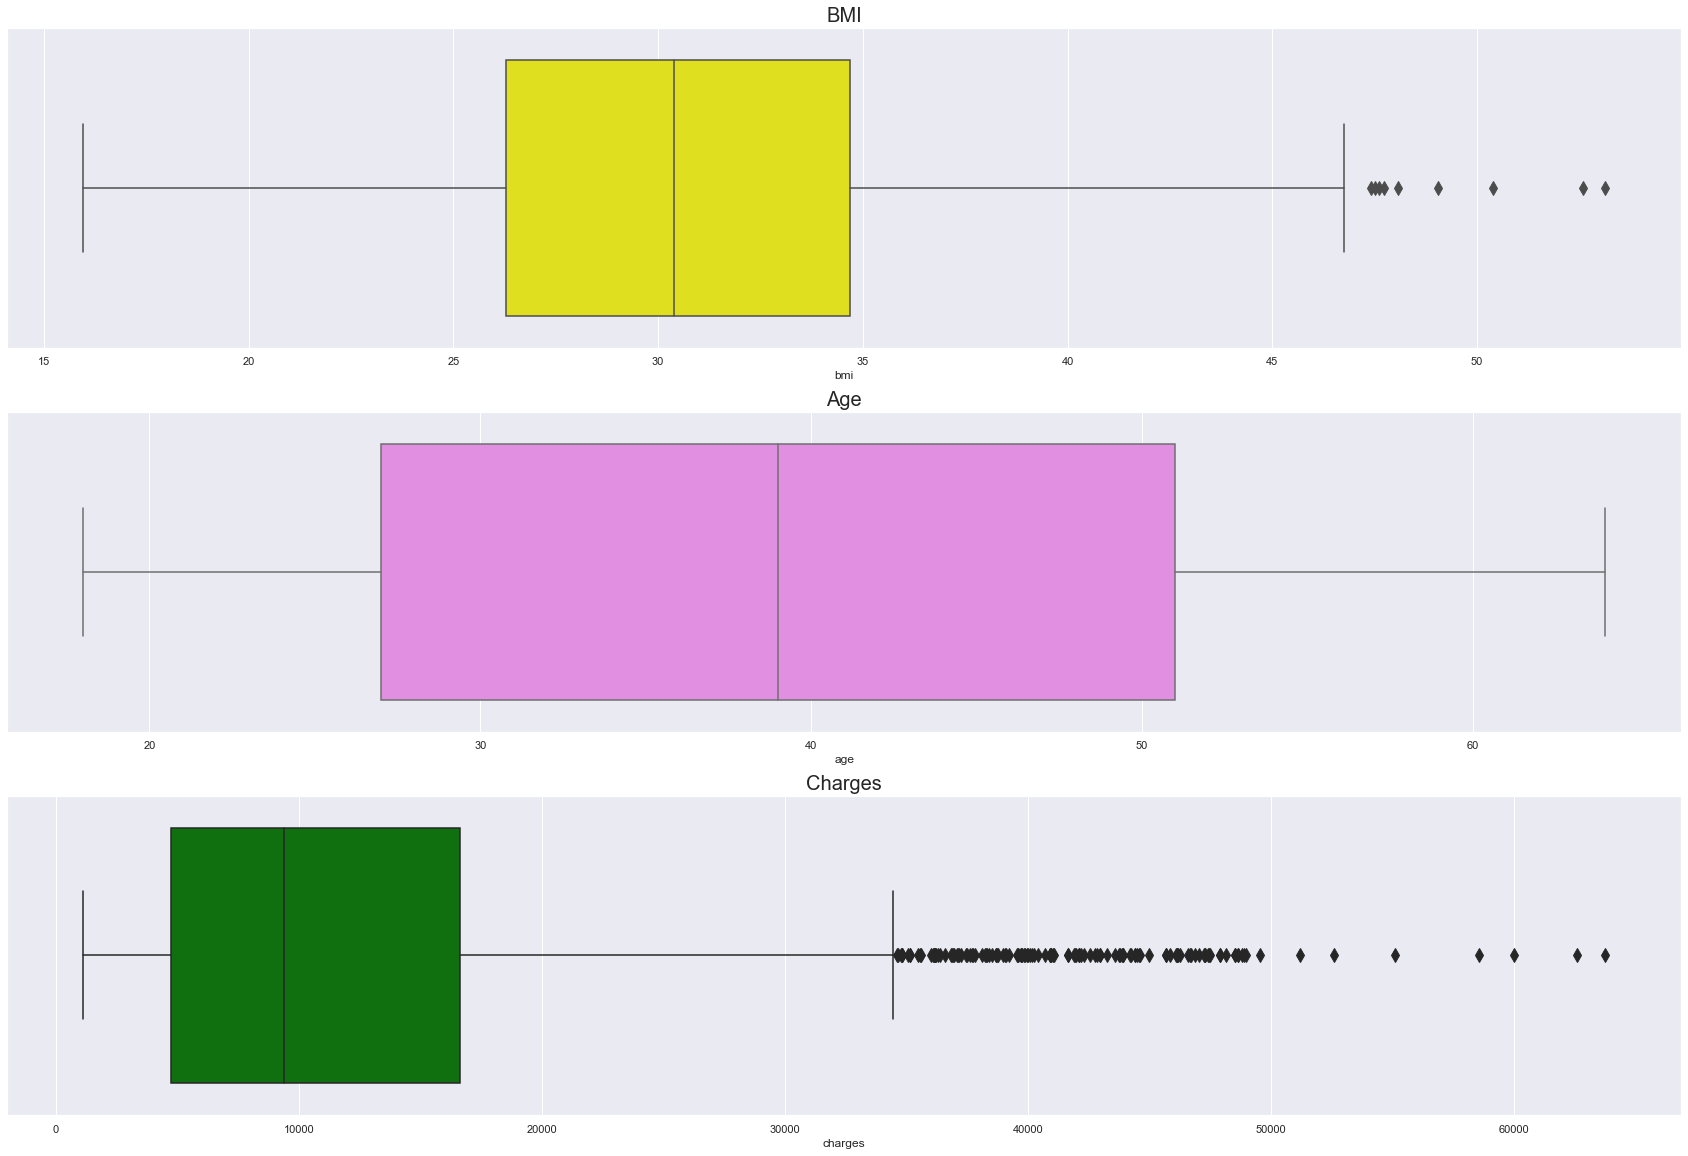

In [119]:
plt.figure(figsize=(30,20))

#Distribution of bmi
plt.subplot(3,1,1)
plt.title(label = 'BMI', fontsize = 20)
sns.boxplot(insurance_df['bmi'], color = 'Yellow', fliersize = 10) 

#Distribution of age
plt.subplot(3,1,2)
plt.title(label = 'Age', fontsize = 20)
sns.boxplot(insurance_df['age'], color = 'Violet', fliersize = 10) 

#Distribution of Charges
plt.subplot(3,1,3)
plt.title(label = 'Charges', fontsize = 20)
sns.boxplot(insurance_df['charges'], color = 'Green', fliersize = 10) 

plt.show() #Displaying all the graphs

## Here, we can observe that-
- BMI has a few extreme values
- Age has a good variance of data meaning the age values are distributed uniformly and there are no extreme values found. 
- Charges as it is highly skewed to the left and has a lot of extreme values

# h. Distribution of categorical columns (including 'children' data)

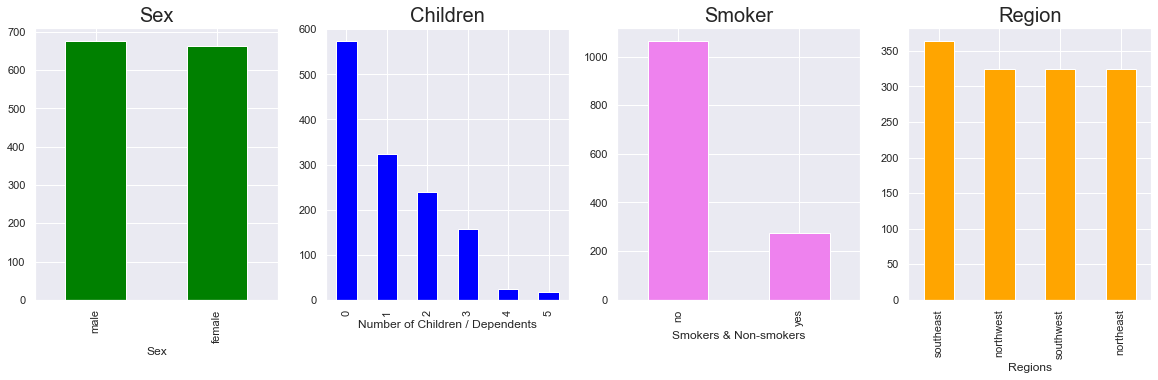

In [120]:
plt.figure(figsize= (20,5))

#Distribution of sex
plt.subplot(1,4,1)
plt.title(label = 'Sex', fontsize = 20)
plt.xlabel('Sex')
insurance_df['sex'].value_counts().plot(kind = 'bar', color = 'Green')

#Distribution of children
plt.subplot(1,4,2)
plt.title(label = 'Children', fontsize = 20)
plt.xlabel('Number of Children / Dependents')
insurance_df['children'].value_counts().plot(kind = 'bar', color = 'Blue')


#Distribution of smoker
plt.subplot(1,4,3)
plt.title(label = 'Smoker', fontsize = 20)
plt.xlabel('Smokers & Non-smokers')
insurance_df['smoker'].value_counts().plot(kind = 'bar', color = 'Violet')


#Distribution of region
plt.subplot(1,4,4)
plt.title(label = 'Region', fontsize = 20)
plt.xlabel('Regions')
insurance_df['region'].value_counts().plot(kind = 'bar', color = 'Orange')

plt.show()     #Displaying all the graphs

## Here we can observe that-
- Gender is distributed evenly. There is not much significant difference seen in the graph.
- Most instances have less than 2 children and very few have 4 or 5 children.
- Number of non-smokers is more than there are smokers in the data.
- Instances are distributed evenly accross all regions.

## i. Pair plot that includes all the columns of the data frame

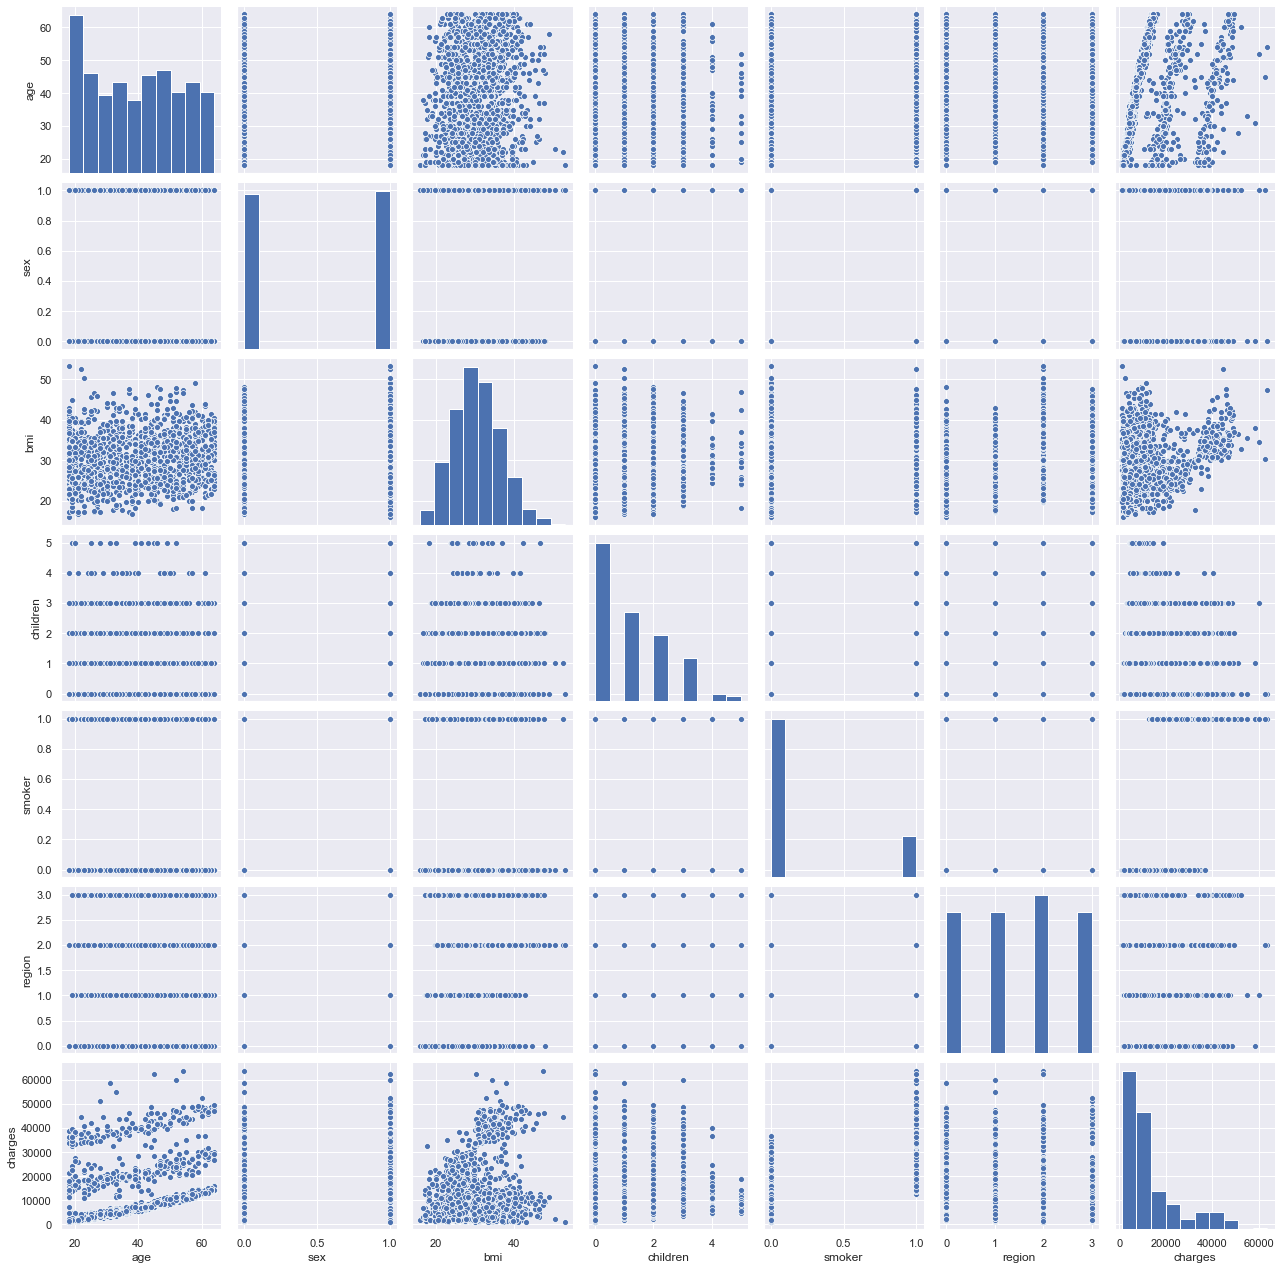

In [121]:
df_encoded = copy.deepcopy(insurance_df)  

#Endcoding the target categorical column values to numerical values between 0 to N 
#Because categorical attributes are not evaluated graphically.
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

#Generating a pairplot for the new dataframe created from insurance_df
sns.pairplot(df_encoded)  

plt.show()           #Displaying the graph

## Here, we can observe that -

- Between ‘age’ and ‘charges’, there is no clear relationshipp because there seems to be 3 up slope lines indicating positive relationship between them. It means, there are 3 sets of charges which increase gradually with age.
- The plot between ‘age’ and ‘bmi’ has data spread all over stating that there is no relationship between them. The plot is more like a cloud and lacks direction. 
- The range of ‘bmi’ decreases as children increases, however there are some extreme values in ‘bmi’ for children value 5. 
- There is a little positive relation between ‘bmi’ and ‘charges’, although the plot is a cloud on initial values of ‘charges’. - The range of ‘charges’ decreases as the value of ‘children’ increases.
- Also, the only obvious correlation of 'charges' is with 'smoker'. The smokers claimed more money than non-smokers.

# 4. Answers with statistical evidence

## a. Do charges of people who smoke differ significantly from the people who don't?

In [150]:
#Checking the count of different values in Smoker Column

insurance_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

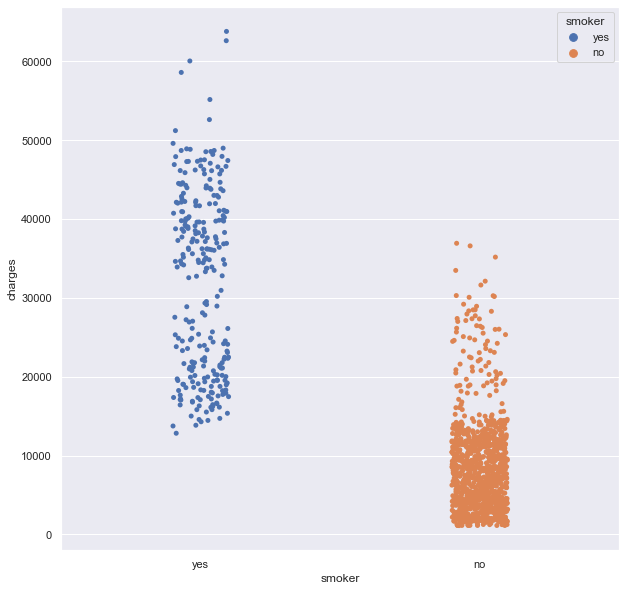

In [151]:
#Displaying 'Smoker' & 'Charges' data in a graph

plt.figure(figsize=(10,10))
sns.stripplot(insurance_df.smoker,insurance_df.charges, hue = insurance_df.smoker)

plt.show()

## From the graph, we can indicate that

- There are certain values of ‘charges’ where there are people who smoke and there are people who do not smoke intersecting.
- People who smoke have claimed high charges and the people who do not smoke have considerably claimed very low charges. 
    
    So, charges do differ for people who smoke from the people who do not smoke but not significantly as there is some intersection of values for both types of people.

In [144]:
# Statistically proving the above
# T-test to check dependency of smoking on charges

Ho = "Charges of smoker and non-smoker are same"         #Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are different"    #Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.smoker == 'yes'].charges)  #Selecting charges corresponding to smokers in an array
y = np.array(insurance_df[insurance_df.smoker == 'no'].charges)   #Selecting charges corresponding to non-smokers in an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)             #Performing a T-test

if p_value < 0.05:                                       #Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are different as the p_value (8.271435842179102e-283) < 0.05


## b. Does BMI of males differ significantly from that of females?

In [152]:
#Checking the count of different values in Sex Column

insurance_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [249]:
df_gender = copy.deepcopy(insurance_df)  
label_encoder = preprocessing.LabelEncoder()  
df_gender['sex']= label_encoder.fit_transform(df_gender['sex']) 
# df_test['sex'].unique()
# df_gender['sex'].value_counts()

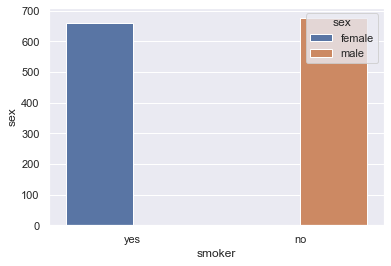

In [250]:
#Displaying the proportion of smokers with respect to gender
gender = df_gender['sex'].value_counts()
sns.barplot(df_gender.smoker,gender, hue = insurance_df.sex)

plt.show()

In [251]:
# T-test to check dependency of bmi on gender

Ho = "Gender has no effect on bmi"   #Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   #Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.sex == 'male'].bmi)   #Selecting bmi values corresponding to males as an array
y = np.array(insurance_df[insurance_df.sex == 'female'].bmi) #Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)   #Performing a T-test

if p_value < 0.05:                             #Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Gender has no effect on bmi as the p_value (0.08997637178984932) > 0.05


- BMI of both the genders does not differ significantly as proved statistically & seen in the above graph.

## c. Is the proportion of smokers significantly different in different genders? 

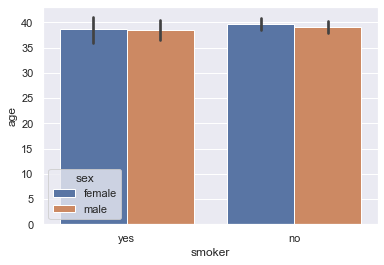

In [252]:
#Displaying the proportion of smokers with respect to gender

sns.barplot(insurance_df.smoker,insurance_df.age, hue = insurance_df.sex)

plt.show()

In [253]:
# Chi_square test to check if smoking habits are different for different genders

Ho = "Proportion of smokers is the same in both the genders"    #Stating the Null Hypothesis
Ha = "Proportion of smokers is different in both the genders"   #Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker'])  # Contingency table of sex and smoker attributes
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
crosstab

if p_value < 0.05:                                              #Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Proportion of smokers is different in both the genders as the p_value (0.007) < 0.05


Here, we can indicate that proportion of smokers is different in both the genders but it is not a significant difference as the p_value is 0.007.

## d. Is the distribution of bmi across women with no children, one child and two children, the same? 

In [254]:
# Test to see if the distributions of bmi values across women with no children, one child and two children is the same or not

Ho = "No. of children has no effect on BMI"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on BMI"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']  #Selecting women who have no kids
one = female_df[female_df.children == 1]['bmi']   #Selecting women who have one kids
two = female_df[female_df.children == 2]['bmi']   #Selecting women who have two kids

f_stat, p_value = stats.f_oneway(zero,one,two)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')


No. of children has no effect on BMI as the p_value (0.7158579926754841) > 0.05


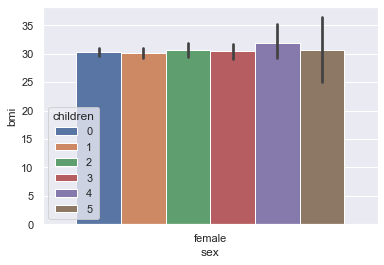

In [255]:
#Displaying distribution of BMI across all the women with different number of children

sns.barplot(female_df.sex,female_df.bmi, hue = female_df.children)

plt.show()

From the above statistical evidence, we can state that the distributions of BMI are nearly same across women with 0, 1 or 2 children. This means that BMI of a woman does not affect the number of children a woman has. So, BMI & Number of children is not related.